# 1. 决策树

![decisionTree](decisionTree.png)

决策树是是基于树结构进行决策的，例如对图中的是否出门进行决策是，通常会进行一系列的子决策。

- 一般的一棵决策树包含一个根节点，若干内部节点和若干叶节点；
- 叶节点对应于决策结果，其他每个节点则对应与一个属性测试；
- 每个节点包含的样本集合根据属性测试的结果被划分到子节点中；
- 根节点包含样本全集。
- 从根节点到每个叶节点的路径对应了一个判定测试序列。

决策树学习的目的是为了产生一棵泛化能力强，即处理未见示例能力强的决策树。

## 1.1. 信息增益

决策树学习的关键是如何选择最优划分属性，一般而言，随着划分过程的不断进行，我们希望决策树的分支节点所包含的样本尽可能的属于同意类别，即节点的纯度(purity)越来越高。

划分数据集之前之后信息发生的变化称为信息增益，获得信息增益高的为好的选择。

“信息熵”(information entropy)定义为信息的期望。

假设当前样本集合D中的第k类样本所占比例为pk(k=1,2...n)，则D的信息熵为：  
$
Ent(D)=-\sum_{k=1}^{n}p_k \log_2 p_k
$  
n是分类的数量，Ent(D)的值越小，则D的纯度越高

假定离散属性a有V个可能的取值$\{a^1, a^2, .... a^V\}$，若使用a对样本D进行划分，则会产生V个分支节点，其中第v个分支包含了D中所有在属性a上取值为$a^v$的样本，记为$D^v$，由于不同分支所包含的样本数不同，因此给分支节点赋予权重，$\frac{|D^v|}{|D|}$，即样本越多的分支影响力越大。

信息增益(information gain)为 $Gain(D,a) = Ent(D)-\sum_{v=1}^V \frac{|D^v|}{|D|}Ent(D^v)$

一般而言，信息增益越大，则意味着使用属性a来划分所获得的“纯度提升”越大。

举例：

| 编号 | 色泽 | 根蒂 | 好瓜 |  
| :---: | :---: | :---: | :---: |
| 1 | 青绿 | 蜷缩 | 是 |
| 2 | 乌黑 | 蜷缩 | 是 |
| 3 | 乌黑 | 稍蜷 | 是 |
| 4 | 乌黑 | 稍蜷 | 否 |
| 5 | 青绿 | 硬挺 | 否 |

可以看出，共有两类样本，好瓜和坏瓜，其中正例占 $p_1 = \frac{3}{5}$，反例占$p_2 = \frac{2}{5}$

可以算出根节点的信息熵为：
$
Ent(D) = -\sum_{k=1}^2 pk \log_2 pk=-(\frac{3}{5}\log_2 \frac{3}{5} + \frac{2}{5}\log_2 \frac{2}{5}) = 0.971
$

计算色泽的增益：

色泽共有3种类型： 青绿，乌黑

子集$D^1$青绿包含的编号为{1,5}，其中正例占$\frac{1}{2}$，反例占$\frac{1}{2}$

子集$D^2$乌黑包含的编号为{2,3,4}，其中正例占$\frac{2}{3}$,反例占$\frac{1}{3}$

$
Ent(D^1) = -(\frac{1}{2}\log_2 \frac{1}{2} + \frac{1}{2}\log_2 \frac{1}{2})=1.0
Ent(D^2) = -(\frac{2}{3}\log_2 \frac{2}{3} + \frac{1}{3}\log_2 \frac{1}{3})=0.918
$

色泽的信息增益为：  
$
Gain(D,色泽) = Ent(D) - \sum_{v=1}^2 \frac{|D^v|}{|D|} Ent(D^v) \\
= 0.971 - (\frac{2}{5}*1.0 + \frac{3}{5}*0.918) \\
= 0.02
$

In [1]:
import math
print(math.log(3/5,2)*(3/5) + math.log(2/5,2)*(2/5))
print(math.log(1/2,2)*(1/2) + math.log(1/2,2)*(1/2))
print(math.log(2/3,2)*(2/3) + math.log(1/3,2)*(1/3))
print(0.971-(2/5)-(3/5)*0.918)

-0.9709505944546686
-1.0
-0.9182958340544896
0.020199999999999996


根据上述内容，编写信息熵和信息增益的代码

In [2]:
import pandas as pd
import numpy as np
import math

'''
    Return:
        ent: 信息熵
'''
def entropy(df):
    dataSet = df.iloc[:,0:-1]
    labels = df['labels']
    arrlabels = np.array(labels)
    setlabels = set()
    
    totalnum = len(dataSet)
    
    for i in arrlabels:
        setlabels.add(i)
    # 标签的种类    
    typenums = len(setlabels)
    
    ent = 0
    for i in setlabels:
        tmplen = len(df[df['labels']==i])
        ent += math.log(tmplen/totalnum,2)*(tmplen/totalnum)
    
    ent = -ent
    
    return ent


'''
    Args:
        df:  可以认为是原始的dataFrame
        attribute： 要计算信息增益的属性名
    Return:
        ent: 信息增益
        
'''
# attribute 对应上面的 “色泽”
def gain(df, attribute):
    dataSet = df.iloc[:,0:-1]
    labels = df['labels']
    totalnum = len(dataSet)
    # 计算根节点的信息熵
    ent = entropy(df)
    
    # 在属性a上计算信息熵
    a = df[attribute]
    a = np.array(a)
    # 统计属性a有几种类型
    aset = set()
    for i in a:
        aset.add(i)
#     print(len(aset))
    for i in aset:
        tmpdf = df[df[attribute]==i]
        tmpdataSet = tmpdf.iloc[:,0:-1]
        tmplabels = tmpdf['labels']
        re = entropy(tmpdf)
#         print(re, len(tmpdataSet)/totalnum)
        ent-=re*(len(tmpdataSet)/totalnum)
        
    return ent



In [107]:
# 测试信息增益计算的正确性，测试数据来自 西瓜书 p76页

df = pd.read_csv('watermallon')
# dataSet = df.iloc[:,0:-1]
# labels = df['labels']
print(gain(df, 'color'))
print(gain(df, 'root'))
print(gain(df, 'knock'))
print(gain(df, 'stripp'))
print(gain(df, 'sto'))
print(gain(df, 'feel'))

0.10812516526536531
0.14267495956679288
0.14078143361499584
0.3805918973682686
0.28915878284167906
0.006046489176565639


In [59]:
# 在纹理=清晰的分支节点上，计算个属性的信息增益

tdf = df[df['stripp']=="清晰"]
# dataSet = df.iloc[:,0:-1]
# labels = df['labels']
print(gain(tdf, 'color'))
print(gain(tdf, 'root'))
print(gain(tdf, 'knock'))
print(gain(tdf, 'sto'))
print(gain(tdf, 'feel'))

0.04306839587828004
0.45810589515712374
0.33085622540971754
0.45810589515712374
0.45810589515712374


## 1.2. 增益率

信息增益准则对可取数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，C4.5决策树算法不直接使用信息增益，而使用“增益率”(gain ratio)来选择最优划分属性。

增益率定义为：  
$
Gain\_ratio(D,a) = \frac{Gain(D,a)}{Iv(a)}
$  
其中  
$
IV(a)=-\sum_{v=1}^{V} \frac{|D^v|}{|D|} \log_2 \frac{|D^v|}{|D|}
$  
称为属性a的“固有值”(intrinsic value)。属性a的可能取值数目越多(即V越大)，则$IV(a)$的值通常会越大。

增益率则对可取值数目较少的属性有所偏好，因此，C4.5算法并不是直接选择增益率最大的候选划分属性，而是使用了一个启发式：先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择增益率高的。

## 1.3. 基尼指数
CART决策树使用“基尼指数”来选择划分属性，数据集D的纯度可用基尼指数值来度量：

$
Gini(D)=\sum_{k=1}^{|y|}\sum_{k'\neq k}p_kp_{k'} \\
=1-\sum_{k=1}^{|y|}p_k^2
$

Gini(D)反应了从数据集D中随机抽取两个样本，其类别标记不一致的概率，其值越小，则数据集D的纯度越高。

属性a的基尼指数定义为

$
Gini\_index(D,a)=\sum_{v=1}^{V} \frac{|D^v|}{|D|}Gini(D^v)
$

于是，我们在候选属性集合A中，选择那个使得划分后基尼指数最小的属性作为最优划分属性，即
$
a_*={\underset {a\in A}{\operatorname {arg\,min} }}\,Gini\_index(D,a)
$

In [60]:
# 划分数据集
'''
    根据信息增益选择最好的划分方式
    Args:
        df: dataFrame
    Returns:
        bestGain: 最好划分属性对应的信息增益
        bestAttri: 最好的划分属性，例如"color"

'''

def splitDataSet(df):
    numFeatures = len(np.array(df.head(1))[0]) - 1
    bestGain = 0
    bestAttri = ''
    
    # 这里认为最后一列是标签列
    tmpdf = df.iloc[:,0:-1]
    for i in tmpdf.columns:
        tmpGain = gain(df, i)
        if tmpGain > bestGain:
            bestGain = tmpGain
            bestAttri = i
            
    return bestGain,bestAttri
    

In [61]:
print(splitDataSet(df))
tdf1 = df[df['stripp']=="清晰"]
print(splitDataSet(tdf1))
tdf2 = tdf1[tdf1['root']=="稍蜷"]
print(splitDataSet(tdf2))

(0.3805918973682686, 'stripp')
(0.45810589515712374, 'root')
(0.2516291673878229, 'color')


## 1.4. 构建决策树
下面的伪代码来自西瓜书

![decisionTreeAlgorithm](decisionTreeAlgorithm.jpg)

In [108]:
'''
    树节点：
        val：分类的属性名
        children: 列表，children==None时是叶子节点


    Args:
        df: 训练集
        A: 属性集
    Return:
        dTree: 决策树
'''

import copy

class DecisionTree:
    # attribute: 分类的属性
    # type: 分类（好瓜/坏瓜）
    def __init__(self, val):
        self.val = val
        self.attribute = None
        self.type = None
        self.children = None
        self.childName = None
        
#找出类别中包含数量最多的类
def findMost(labels, df):
    most = 0
    mostlabel = ''
    for i in labels:
        num = len(df[df['labels']==i])
        if num > most:
            most = num
            mostlabel = i
    return mostlabel

def treeGenerate(df, A, df1):
    node = DecisionTree(df)
    labels = df['labels']
    labelset = set(labels)
    
#     print('--------%s----------'%bestAttri, A)

    #属于同一类别C
    if len(labelset) == 1:
        node.type = list(labelset)[0]
        return node
    if A==None or len(A)==1:
        node.type = findMost(labels, df)
        return node
    bestGain,bestAttri = splitDataSet(df)
    node.attribute = bestAttri
    dfattri = df1[bestAttri]
    attriset = set(np.array(dfattri))
    node.children = []
    node.childName = []
    AA = copy.copy(A)
    AA.remove(bestAttri)
    for i in attriset:
        node.childName.append(i)
        tmpdf = df[df[bestAttri]==i]
        newnode = DecisionTree(tmpdf)
        if len(tmpdf)==0:
            newnode.type = findMost(labels, df)
            node.children.append(newnode)
            continue 
        
        node.children.append(treeGenerate(tmpdf, AA,df1))

    return node
            

In [109]:
A = set(df.columns.values[0:-1])
t = treeGenerate(df, A,df)
queue = []
queue.append(t)
while len(queue)>0:
    node = queue.pop(0)
    print(node.attribute, node.type)
    print(node.childName)
    print(node.val)
    print(node.children)
    print("--------------")
    if node.children != None:
        for i in node.children:
            queue.append(i)

stripp None
['vivid', 'vigue', 'littlevigue']
    color        root   knock       stripp           sto      feel labels
0   green        roll    dull        vivid        sunken  slippery   good
1   black        roll  silent        vivid        sunken  slippery   good
2   black        roll    dull        vivid        sunken  slippery   good
3   green        roll  silent        vivid        sunken  slippery   good
4   white        roll    dull        vivid        sunken  slippery   good
5   green  littleroll    dull        vivid  littlesunken      soft   good
6   black  littleroll    dull  littlevigue  littlesunken      soft   good
7   black  littleroll    dull        vivid  littlesunken  slippery   good
8   black  littleroll  silent  littlevigue  littlesunken  slippery    bad
9   green        hard   clear        vivid        smooth      soft    bad
10  white        hard   clear        vigue        smooth  slippery    bad
11  white        roll    dull        vigue        smooth      soft

In [110]:
# df['color'] = tttttdf['color'].map({1: "青绿", 2: "乌黑", 3:"浅白"})
# df['root'] = tttttdf['root'].map({1: "蜷缩", 2: "稍蜷", 3:"硬挺"})
# df['knock'] = tttttdf['knock'].map({1: "浊响", 2: "沉闷", 3:"清脆"})
# df['stripp'] = tttttdf['stripp'].map({1: "清晰", 2: "稍糊", 3:"模糊"})
# df['sto'] = tttttdf['sto'].map({1: "凹陷", 2: "稍凹", 3:"平坦"})
# df['feel'] = tttttdf['feel'].map({1: "硬滑", 2: "软粘"})
# df['labels'] = tttttdf['labels'].map({1:"好瓜",0:"坏瓜"})

## 1.5. 绘制树形图

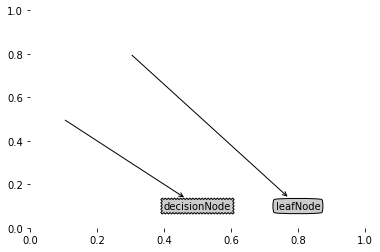

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords="axes fraction",
                           xytext=centerPt, textcoords="axes fraction",
                           va="center", ha="center", bbox=nodeType,
                           arrowprops=arrow_args)
    
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('decisionNode', (0.5,0.1),(0.1,0.5), decisionNode)
    plotNode('leafNode', (0.8,0.1),(0.3,0.8), leafNode)
    plt.show()
    
    
createPlot()

In [112]:
import copy

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def getNumLeafs(dcTree):
    leafnum = 0
    if dcTree.children == None:
        return 1
        
    if dcTree.children != None:
        for i in dcTree.children:
            leafnum += getNumLeafs(i)
        
    return leafnum

def getTreeDepth(dcTree):
    queue = []
    leval = 0
    
    parents = []
    queue.append(dcTree)
    parents.append(dcTree)
    brothers = []
    brothers.append(dcTree)
    while len(queue)>0:
        tmp = queue.pop(0)
        parents.pop(0)
        
        if len(parents)==0:
            parents = copy.copy(brothers)
            brothers=[]
            leval += 1
        if tmp.children != None:
            for i in tmp.children:
                brothers.append(i)
                queue.append(i)
    return leval

def plotTree(dcTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(dcTree)
    depth = getTreeDepth(dcTree)
    firstStr = dcTree.attribute
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,
             plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    if dcTree.children!=None:
        for i in dcTree.children:
            if i.children != None:
                plotTree(i, cntrPt, dcTree.childName[dcTree.children.index(i)])
            else:
                plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
                plotNode(i.type, (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
                tmpstr = dcTree.childName[dcTree.children.index(i)]
                print(tmpstr)
                plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, tmpstr)
        
    plotNode.yOff = plotTree.yOff + 1.0/plotTree.totalD
    

In [113]:
getNumLeafs(t)

9

In [114]:
getTreeDepth(t)

5

hard
roll
white
green
slippery
soft
vigue
slippery
soft


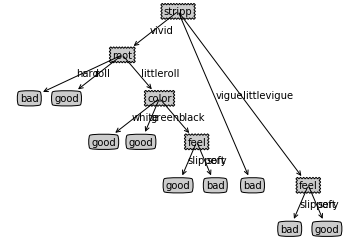

In [115]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprop = dict(xticks =[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprop)
    
    plotTree.totalW = float(getNumLeafs(t))
    plotTree.totalD = float(getTreeDepth(t))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(t, (0.5,1.0), "")
    plt.show()
    
    
createPlot()

## 1.6. 测试和存储分类器